# Gradient Boosting

### Theory 

Gradient boosting is a fundamental technique that is essential to the tool-kit of a data scientist and machine-learning engineer. It is a general framework that can be applied to many regression and classification models. 

Our final model $F_M(X)$ will be a linear combination of weak leaners $F_m(X; \theta_m)$ written as,

$$F_M(X) = F_0(X) + \sum^{M}_{m=1} \gamma_m F_m(X; \theta_m)$$

In which, $F_0(X)$ is a parameterless model (essentially an ansatz), $\gamma_m$ is a scalar which determines the relative contribution of each weak learner to the final model and $\theta_m$ which are the parameters of each weak learner respectively. In total, our final model has $(M + 1)$ number of weak leaners. When dealing with regression problems, $F_0(X)$ is often taken as the mean of the predictions $y_i$,

$$F_0(X) = \frac{1}{N} \sum^{N}_{i=1}y_i$$

Once we have calculated $F_0$, we compute the gradient which we will call our residual $\mathbf{r_1}$,

$$\mathbf{r_1} = - \left. \frac{\partial \mathcal{L}}{\partial F_0} \right|_{X = X_i}$$

where $\mathcal{L}(y, F_0(X))$ is our loss function that we aim to minimise. We then fit our first weak leaner with the parameters $\theta_1$, $F_1(X)$ to predict our residual $\mathbf{r_1}$ such that $F_1(X) \approx \mathbf{r_1}$. The specifics are subject to the weak leaner model employed. Once this has been performed, the associated $\gamma_1$ is found from the condition, 

$$ \gamma_1 = \arg\min_{\gamma_1} \sum_{i=1}^{N} \mathcal{L} \left[ y_i, F_{0}(X_i) + \gamma_1 F_{1}(X_i) \right] $$

In other words, $\gamma_1$ is choosen such that it minimises the mean loss across all data points. This is canonically done using a line search algorithm. These steps are repeated until $M$ weak leaners have been created. The puesdocode is as follows, 

$$
\begin{array}{ll}
\textbf{Algorithm:} & \text{Gradient Boosting} \\
1. & F_0(X) \gets \dfrac{1}{N} \sum_{i=1}^{N} y_i \quad \text{(Initial model)} \\

2. & \textbf{for} \ m = 1 \ \textbf{to} \ M \ \textbf{do} \\

3. & \quad r_{i}^{(m)} \gets -\left. \dfrac{\partial \mathcal{L}(y_i, F(X_i))}{\partial F(X_i)} \right|_{F = F_{m-1}} \quad \text{(Compute residuals)} \\

4. & \quad F_m(X; \theta_m) \gets \text{Fit} \{(X_i, r_i^{(m)})\}_{i=1}^{N} \\

5. & \quad \gamma_m \gets \arg\min_{\gamma} \sum_{i=1}^{N} \mathcal{L}(y_i, F_{m-1}(X_i) + \gamma F_m(X_i)) \\

6. & \quad F_m(X) \gets F_{m-1}(X) + \gamma_m F_m(X) \\

7. & \textbf{end for} \\

8. & \textbf{return} \ F_M(X) \\
\end{array}
$$


### Linear Regression + Gradient Boosting

Let us employ gradient boosting to linear regression. Our model,

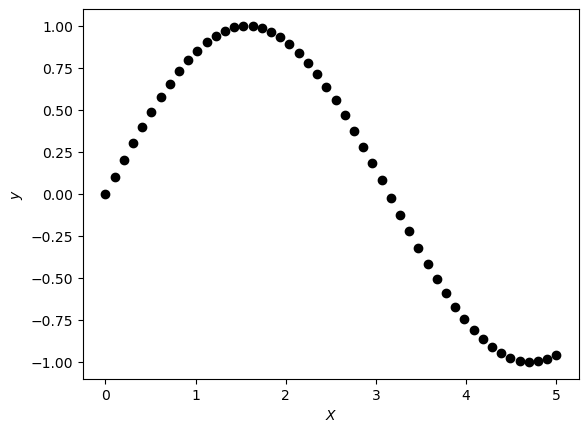

In [152]:
# Importing
import numpy as np
import matplotlib.pyplot as plt

# Creating dataset,
X = np.linspace(start=0, stop=5, num=50)
y = np.sin(X)

# Plotting,
plt.scatter(X, y, color="black")
plt.xlabel("$X$")
plt.ylabel("$y$")
plt.show()

In [153]:
class LinearRegressor():

    def __init__(self):
        """The constructor method where we assign and create class attributes."""

        # Creating class attributes,
        self.X, self.y = None, None
        self.a, self.b = None, None

    def fit(self, X, y):

        # Assignment to class attributes,
        self.X, self.y = X, y

        # Computing parameters via analytic solution,
        X_mean, y_mean, Xy_mean, X2_mean = np.mean(self.X), np.mean(self.y), np.mean(self.X*self.y), np.mean(self.X**2)
        model_b = (X_mean*y_mean - Xy_mean)/(X_mean**2 - X2_mean)
        model_a = y_mean - model_b*X_mean

        # Assignment to class attributes,
        self.a, self.b = model_a, model_b

        return None
    
    def predict(self, X):
        return self.a + self.b*X.ravel()

In [154]:
def predict(X, weak_learners, gammas):
    y_pred = weak_learners[0].predict(X)
    for F_m, gamma in zip(weak_learners[1:], gammas):
        y_pred += gamma*F_m.predict(X)
    return y_pred

# HYPERPARAMERS
M = 1

# Computing ansatz,
F0 = LinearRegressor()
F0.a, F0.b = np.mean(y), 0

# Adding to model,
WEAK_LEARNERS = [F0]
GAMMAS = []

for m in range(1, (M + 1)):

    # Computing current model predictions,
    y_pred = predict(X, weak_learners=WEAK_LEARNERS, gammas=GAMMAS)

    # Calculating the residuals,
    residuals = -2 * (y - y_pred)

    # Fitting linear regressor to the residuals,
    F_m = LinearRegressor()
    F_m.fit(X, residuals)
    F_m_pred = F_m.predict(X)

    # Computing gamma,
    gamma_m = np.dot((y - y_pred), F_m_pred)/np.dot(F_m_pred, F_m_pred)

    # Adding regressor to weak leaners list,
    WEAK_LEARNERS.append(F_m)
    GAMMAS.append(gamma_m)

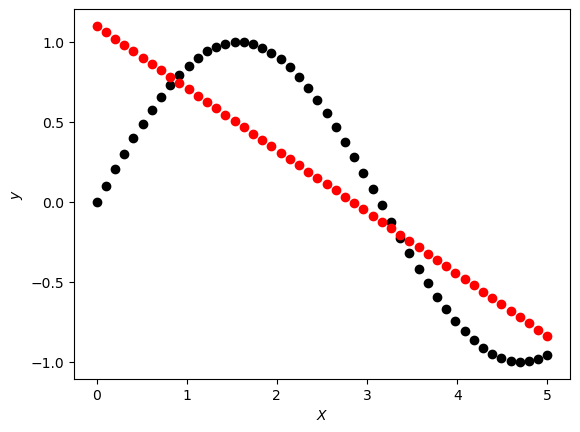

In [155]:
y_pred = predict(X, weak_learners=WEAK_LEARNERS, gammas=GAMMAS)

# Plotting,
plt.scatter(X, y, color="black")
plt.scatter(X, y_pred, color="red")
plt.xlabel("$X$")
plt.ylabel("$y$")
plt.show()